# Quora Question Pairs : a Machine Learning Overview
## Can you identify question pairs that have the same intent?
------------------------------------

*This project is related to the Kaggle challenge "Quora Question Pair" for the detection of duplicate questions in Quora's database. In the context of Internet and and social networks, Quora is one of the main "Question/Answers" website, where thousands of users can find specific answers to a variety of topics, with more than 15 millions now (in june 2017). Because the overall number of questions is endlessly growing, the probability of finding duplicate questions or already answered questions is non zero. Hence, several issues can be pointed out: like misleading futures searches, or increasing the databases with duplicates... *



### Introduction
Over the last decades, with the exponential growth of collected data, a novel idea aim at avoiding to store duplicate data, hence limiting the storage of data,and avoiding end-users to do misleading searches. In this context, Quora stores millions of questions and answers that are upvoted by users, with the goal to provide a specialized question answer search engine. Similarly to specialized search engine, where the zero probability to only find unique search does not exist, in such question/answer website have the same issue. As already explained, in such website, avoiding useless duplicates is of major importance. This is achieved in two different way: finding duplicate questions and merging the answers in the database, or when a new question is asked.

In the machine learning community, such approach is known as *instance matching* or *matching pairs* problems and lie in the *information/document retrieval* problems, with several methods based on some specific loss functions or similarity functions. Such methods as been successfully applied on a variety of problem from document/image matching based on some extracted features, but when tackling text data, using such approach become more difficult. 

In the natural language processing community, several method has been proposed to describe semantics and corpus of text data, e.g.g by introducing some specific features and specific representations of letter/word/sentences. Despite promising works, processing text is a tedious task, based on some prior knowledge of language and context. 


### Motivation of this work

This project aim at investigating recent advances in both community, with the Quora Question Pair challenge as case study. This project is an empirical study that investigates the text matching pair problem with a machine learning and natural language processing perspective. After a series of preliminary experiments on the data we aim at investigating the representation of text and pairs w.r.t. different binary classifier.



### Related Works
### Bibliography

**Martin, T., Shen, Y., & Azvine, B. (2008)**. Incremental evolution of fuzzy grammar fragments to enhance instance matching and text mining. IEEE Transactions on Fuzzy Systems, 16(6), 1425-1438.

**Rong, S., Niu, X., Xiang, E., Wang, H., Yang, Q., & Yu, Y. (2012)**. A machine learning approach for instance matching based on similarity metrics. The Semantic Web–ISWC 2012, 460-475.

**Liu, N., Zhang, B., Yan, J., Chen, Z., Liu, W., Bai, F., & Chien, L. (2005, November)**. Text representation: From vector to tensor. In Data Mining, Fifth IEEE International Conference on (pp. 4-pp). IEEE.

**Harish, B. S., Guru, D. S., & Manjunath, S. (2010)**. Representation and classification of text documents: A brief review. IJCA, Special Issue on RTIPPR (2), 110-119.

**Breiman, L. (2001)**. Random forests. Machine learning, 45(1), 5-32.

**Chen, T., & Guestrin, C. (2016, August)**. Xgboost: A scalable tree boosting system. In Proceedings of the 22Nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining (pp. 785-794). ACM.

**Mikolov, T., Karafiát, M., Burget, L., Cernocký, J., & Khudanpur, S. (2010, September)**. Recurrent neural network based language model. In Interspeech (Vol. 2, p. 3).

**Gers, F. A., Schmidhuber, J., & Cummins, F. (2000)**. Learning to forget: Continual prediction with LSTM. Neural computation, 12(10), 2451-2471.

**Parikh, A. P., Täckström, O., Das, D., & Uszkoreit, J. (2016)**. A decomposable attention model for natural language inference. arXiv preprint arXiv:1606.01933.

**Bahdanau, D., Chorowski, J., Serdyuk, D., Brakel, P., & Bengio, Y. (2016, March)**. End-to-end attention-based large vocabulary speech recognition. In Acoustics, Speech and Signal Processing (ICASSP), 2016 IEEE International Conference on (pp. 4945-4949). IEEE.

**Rocktäschel, T., Grefenstette, E., Hermann, K. M., Kočiský, T., & Blunsom, P. (2015)**. Reasoning about entailment with neural attention. arXiv preprint arXiv:1509.06664.

**Huang, Z., Xu, W., & Yu, K. (2015)**. Bidirectional LSTM-CRF models for sequence tagging. arXiv preprint arXiv:1508.01991.

**Yao, K., Cohn, T., Vylomova, K., Duh, K., & Dyer, C. (2015)**. Depth-gated LSTM. arXiv preprint arXiv:1508.03790.

**Irie, K., Tüske, Z., Alkhouli, T., Schlüter, R., & Ney, H. (2016)**. LSTM, GRU, highway and a bit of attention: an empirical overview for language modeling in speech recognition. Interspeech, San Francisco, CA, USA.


### Dataset

#### Raw Data
The following section introduces the Quora Question Pairs dataset and gives a quick overview of of the underlying behing the difficulty.

In [5]:
import os
import numpy as np
import pandas as pd
import seaborn.apionly as sns
import matplotlib.pyplot as plt
import xgboost
from xgboost import plot_tree
from xgboost import plot_importance
import matplotlib.pyplot as plt
from graphviz import Digraph
# load data
import pydot
plt.style.use('ggplot')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
%matplotlib inline
colors = sns.color_palette()

from nltk.corpus import stopwords 
from nltk.stem import SnowballStemmer
import re
from string import punctuation

stops = set(stopwords.words("english"))

def text_to_wordlist(text, remove_stopwords=True, stem_words=False):
    # Clean the text, with the option to remove stopwords and to stem words.
    # Convert words to lower case and split them
    text = str(text)
    text = text.lower().split()

    # Optionally, remove stop words
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        text = [w for w in text if not w in stops]

    text = " ".join(text)
    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i m", "i am", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'m", " am ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"60k", " 60000 ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    text = re.sub(r"quikly", "quickly", text)
    text = re.sub(r"usa", "America", text)
    text = re.sub(r"canada", "Canada", text)
    text = re.sub(r"japan", "Japan", text)
    text = re.sub(r"germany", "Germany", text)
    text = re.sub(r"burma", "Burma", text)
    text = re.sub(r"rohingya", "Rohingya", text)
    text = re.sub(r"zealand", "Zealand", text)
    text = re.sub(r"cambodia", "Cambodia", text)
    text = re.sub(r"zealand", "Zealand", text)
    text = re.sub(r"norway", "Norway", text)
    text = re.sub(r" uk ", " England ", text)
    text = re.sub(r"india", "India", text)
    text = re.sub(r"pakistan", "Pakistan", text)
    text = re.sub(r"britain", "Britain", text)
    text = re.sub(r"switzerland", "Switzerland", text)
    text = re.sub(r"china", "China", text)
    text = re.sub(r"chinese", "Chinese", text)
    text = re.sub(r"imrovement", "improvement", text)
    text = re.sub(r"intially", "initially", text)
    text = re.sub(r"quora", "Quora", text)
    text = re.sub(r" dms ", "direct messages ", text)
    text = re.sub(r"demonitization", "demonetization", text)
    text = re.sub(r"actived", "active", text)
    text = re.sub(r"kms", " kilometers ", text)
    text = re.sub(r" cs ", " computer science ", text)
    text = re.sub(r" upvotes ", " up votes ", text)
    text = re.sub(r" iphone ", " phone ", text)
    text = re.sub(r"\0rs ", " rs ", text)
    text = re.sub(r"calender", "calendar", text)
    text = re.sub(r"ios", "operating system", text)
    text = re.sub(r"gps", "GPS", text)
    text = re.sub(r"gst", "GST", text)
    text = re.sub(r"programing", "programming", text)
    text = re.sub(r"bestfriend", "best friend", text)
    text = re.sub(r"dna", "DNA", text)
    text = re.sub(r"iii", "3", text)
    text = re.sub(r"california", "California", text)
    text = re.sub(r"texas", "Texas", text)
    text = re.sub(r"tennessee", "Tennessee", text)
    text = re.sub(r"the us", "America", text)
    text = re.sub(r"trump", "Trump", text)

    # Remove punctuation from text
    text = ''.join([c for c in text if c not in punctuation])

    # Optionally, shorten words to their stems
    if stem_words:  
        text = text.split()
        stemmer = SnowballStemmer('english')
        stemmed_words = [stemmer.stem(word) for word in text]
        text = " ".join(stemmed_words)

    # Return a list of words
    return(text)

def check_word_match(row):
    q1words = {}
    q2words = {}
    for word in str(row['question1']).lower().split():
        if word not in stops:
            q1words[word] = 1
    for word in str(row['question2']).lower().split():
        if word not in stops:
            q2words[word] = 1
    if len(q1words) == 0 or len(q2words) == 0:
        # The computer-generated chaff includes a few questions that are nothing but stopwords
        return 0
    shared_words_in_q1 = [w for w in q1words.keys() if w in q2words]
    shared_words_in_q2 = [w for w in q2words.keys() if w in q1words]
    R = float((len(shared_words_in_q1) + len(shared_words_in_q2)))/float((len(q1words) + len(q2words)))
    return R

def word_shares(row):
    q1 = set(str(row['question1']).lower().split())
    q2 = set(str(row['question2']).lower().split())
    q1words = q1.difference(stops)
    q2words = q2.difference(stops)
    
    if len(q1words) == 0 or len(q2words) == 0:
            return '0:0:0:0'
    
    q1stops = q1.intersection(stops)
    q2stops = q2.intersection(stops)
    shared_words = q1words.intersection(q2words)
    
    shared_w_ratio = len(shared_words) / (len(q1words) + len(q2words))
    stops_q1_ratio = len(q1stops) / len(q1words)
    stops_q2_ratio= len(q2stops) / len(q2words)
    return '{}:{}:{}:{}'.format(shared_w_ratio, len(shared_words), stops_q1_ratio, stops_q2_ratio)


def similarity(row):
    q1 = set(str(row['question1']).lower().split())
    q2 = set(str(row['question2']).lower().split())
    x, y, xy = len(q1), len(q2), len(q1.intersection(q2))
    
    # Dice
    if (x+y)==0:
        dice = 0
    else:
        dice = 2*xy / (x + y)
   
    # Jaccard
    if len(q1.union(q2)) ==0:
        jaccard = 0
    else:
        jaccard = xy / len(q1.union(q2))
    
    # Simpson, Cosine
    if min(x, y)==0:
        simpson = 0
        cosine = 0
    else:
        simpson = xy / min(x, y)
        cosine = xy / np.sqrt(x*y)
    
    # 信頼度
    if x==0:
        confidence1 = 0
    else:
        confidence1= xy / x
    if y==0:
        confidence2 = 0
    else:
        confidence2= xy / y
        
    return '{}:{}:{}:{}:{}:{}:{}:{}:{}'.format(x, y, xy, dice, jaccard, simpson, cosine, confidence1, confidence2)

In [6]:
quora_train = pd.read_csv('/home/nacim/DATASET_KAGGLE/quora/train.csv')

Total number of question pairs for training: 404290
Duplicate pairs: 36.92%
Total number of questions in the training data: 537933
Number of questions that appear multiple times: 111780


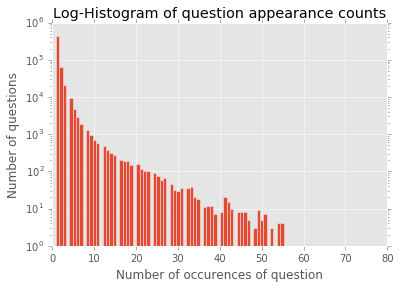

In [7]:
print('Total number of question pairs for training: {}'.format(len(quora_train)))
print('Duplicate pairs: {}%'.format(round(quora_train['is_duplicate'].mean()*100, 2)))
qids = pd.Series(quora_train['qid1'].tolist() + quora_train['qid2'].tolist())
print('Total number of questions in the training data: {}'.format(len(
    np.unique(qids))))
print('Number of questions that appear multiple times: {}'.format(np.sum(qids.value_counts() > 1)))

plt.figure()
plt.hist(qids.value_counts(), range=[0, 80],bins=100)
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurences of question')
plt.ylabel('Number of questions')
plt.savefig('figures/log_histogram.png',bbox_inches='tight')

mean train = 59.8600497168 +/- std strain = 31.9883833431, median=51.0 
min train = 1,  max strain = 1169 


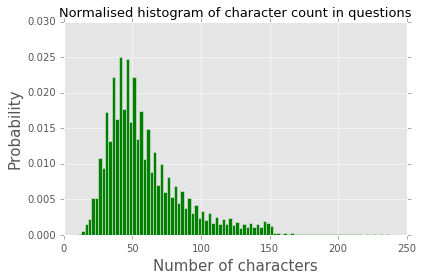

In [9]:
overallquestions = pd.Series(quora_train['question1'].tolist() + quora_train['question2'].tolist()).astype(str)

histo_char = overallquestions.apply(len)
print(r"mean train = {0} +/- std strain = {1}, median={2} ".format(histo_char.mean(),
                                                                   histo_char.std(),
                                                                   histo_char.median()))
print(r"min train = {0},  max strain = {1} ".format(histo_char.min(),histo_char.max()))

plt.figure()
plt.hist(histo_char, bins=100, range=[0, 250], normed=True,color='green')
plt.title('Normalised histogram of character count in questions', fontsize=13)
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)
plt.tight_layout()
plt.savefig('character_counts.',bbox_inches='tight')

mean train = 11.0648556729 +/- std strain = 5.88916765019, median=10.0 
min train = 1,  max strain = 237 


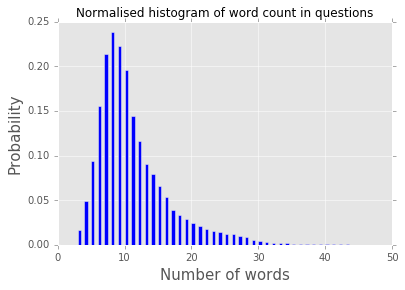

In [12]:
histo_words = overallquestions.apply(lambda x: len(x.split(' ')))
print(r"mean train = {0} +/- std strain = {1}, median={2} ".format(histo_words.mean(),
                                                                   histo_words.std(),
                                                                   histo_words.median()))
print(r"min train = {0},  max strain = {1} ".format(histo_words.min(),histo_words.max()))
plt.hist(histo_words, bins=100, range=[0, 50], color='blue', normed=True)
plt.title('Normalised histogram of word count in questions', fontsize=12)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)
plt.savefig('word_counts.pdf',bbox_inches='tight')

In [13]:
qmarks = overallquestions.apply(lambda x: '?' in x)
fullstop = overallquestions.apply(lambda x: '.' in x)
capital_first = overallquestions.apply(lambda x: x[0].isupper())
capitals = overallquestions.apply(lambda x: max([y.isupper() for y in x]))
lower = overallquestions.apply(lambda x: max([y.islower() for y in x]))
numbers = overallquestions.apply(lambda x: max([y.isdigit() for y in x]))
print('Summary Statistics')
print('Qustions marks: mean={0}% +/- {1}%;\t median={2}%'.format(np.mean(qmarks)*100,
                                                              np.std(qmarks)*100,
                                                              np.median(qmarks)*100))

print('Full Stops: mean={0}% +/- {1}%;\t median={2}%'.format(np.mean(fullstop)*100,
                                                              np.std(fullstop)*100,
                                                              np.median(fullstop)*100))

print('With Numbers: mean={0}% +/- {1}%;\t median={2}%'.format(np.mean(numbers)*100,
                                                              np.std(numbers)*100,
                                                              np.median(numbers)*100))

print('Capital First: mean={0}% +/- {1}%;\t median={2}%'.format(np.mean(capital_first)*100,
                                                              np.std(capital_first)*100,
                                                              np.median(capital_first)*100))

print('With Capital ase Letters: mean={0}% +/- {1}%;\t median={2}%'.format(np.mean(capitals)*100,
                                                              np.std(capitals)*100,
                                                              np.median(capitals)*100))

print('With Lower Case Letters: mean={0}% +/- {1}%;\t median={2}%'.format(np.mean(lower)*100,
                                                              np.std(lower)*100,
                                                              np.median(lower)*100))

Summary Statistics
Qustions marks: mean=99.8738529274% +/- 3.54947801524%;	 median=100.0%
Full Stops: mean=6.3082193475% +/- 24.3110736788%;	 median=0.0%
With Numbers: mean=11.8260407133% +/- 32.2916217057%;	 median=0.0%
Capital First: mean=99.8110267382% +/- 4.34299611825%;	 median=100.0%
With Capital ase Letters: mean=99.9485517821% +/- 2.26763640543%;	 median=100.0%
With Lower Case Letters: mean=99.9810779391% +/- 1.37544467184%;	 median=100.0%


In [15]:
train_word_match = quora_train.apply(check_word_match, axis=1, raw=True)

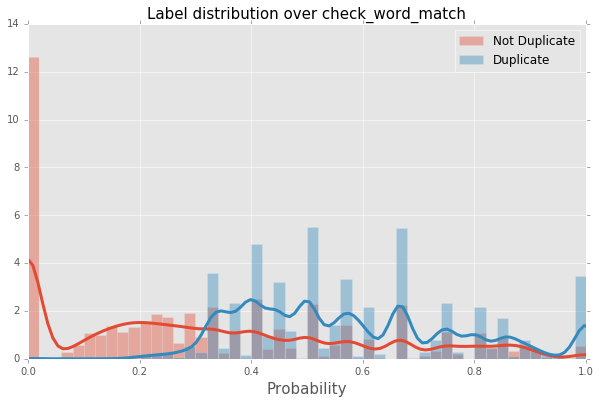

In [16]:
fig = plt.figure(figsize=(10,6))
ax = fig.gca()
for dup_value,label in zip([0,1],['Not Duplicate','Duplicate']):
    x = train_word_match[quora_train['is_duplicate'] == dup_value]
    sns.distplot(x,label=label,kde=True,norm_hist=False,kde_kws={"lw": 3})
    plt.xlim([0,1])
plt.title('Label distribution over check_word_match', fontsize=15)
plt.xlabel('Probability', fontsize=15)
plt.legend()
plt.savefig('shared_words.pdf',bbox_inches='tight')

* Different questions share more words than duplicate questions

#### Cleaning Data
Preliminary experiments have shown that several questions appears multiple time,  hence the training dataset appears to be slightly smaller than expected. As expected, some words have several occurences,e.g. articles or conjunctions... 

Therefore, when comparing the words that match in questions pairs, for each sample, we observe that duplicate questions tends to have words that matches.
However, in order to improve the matching efficiency, a preliminary works aim at cleaning the question strings

In [18]:
def clean_questionpairs(row):
    row['question1'] = text_to_wordlist(row['question1'])
    row['question2'] = text_to_wordlist(row['question2'])
    return row
if os.path.exists('data/train_clean.csv'):
    quora_train_clean = pd.read_csv('data/train_clean.csv')
else:
    quora_train_clean = quora_train.copy()
    quora_train_clean = quora_train_clean.apply(clean_questionpairs,axis=1)
    quora_train_clean.to_csv('data/train_clean.csv',index=False)
    
    

In [19]:
train_word_match_clean = quora_train_clean.apply(check_word_match, axis=1, raw=True)

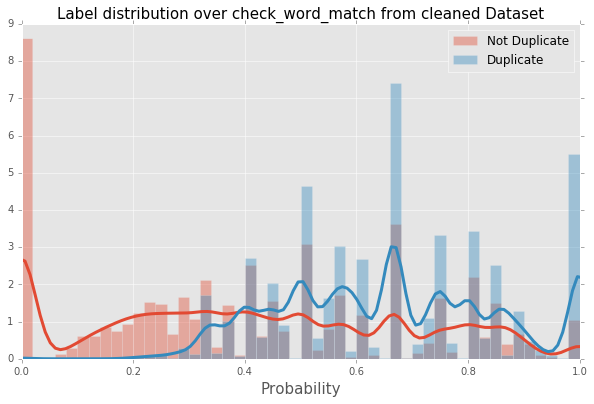

In [21]:
fig = plt.figure(figsize=(10,6))
ax = fig.gca()
for dup_value,label in zip([0,1],['Not Duplicate','Duplicate']):
    x = train_word_match_clean[quora_train_clean['is_duplicate'] == dup_value]
    sns.distplot(x,label=label,kde=True,norm_hist=False,kde_kws={"lw": 3})
    plt.xlim([0,1])
plt.title('Label distribution over check_word_match from cleaned Dataset', fontsize=15)
plt.xlabel('Probability', fontsize=15)
plt.legend()
plt.savefig('shared_words_cleaned.pdf',bbox_inches='tight')

* non duplicate questions tends to share more words
* when the probability  to share words is 0.65,  there are more duplicate questions

In [20]:
def word_match_share(row):
    q1words = {}
    q2words = {}
    for word in str(row['question1']).lower().replace("-","").split():
        if word not in stops:
            q1words[word] = 1
    for word in str(row['question2']).lower().replace("-","").split():
        if word not in stops:
            q2words[word] = 1
    if len(q1words) == 0 or len(q2words) == 0:
        # The computer-generated chaff includes a few questions that are nothing but stopwords
        return 0
    shared_words_in_q1 = [w for w in q1words.keys() if w in q2words]
    shared_words_in_q2 = [w for w in q2words.keys() if w in q1words]
    R = (len(shared_words_in_q1) + len(shared_words_in_q2))/float((len(q1words) + len(q2words)))
    return R


#TF-IDF
from collections import Counter

train_qs = pd.Series(quora_train_clean['question1'].tolist() + quora_train_clean['question2'].tolist()).astype(str)

def get_weight(count, eps=10000, min_count=2):
    if count < min_count:
        return 0
    else:
        return 1 / float((count + eps))

eps = 5000
words = (" ".join(train_qs)).lower().split()
counts = Counter(words)
weights = {word: get_weight(count) for word, count in counts.items()}

print('Most common words and weights: \n')
print(sorted(weights.items(), key=lambda x: x[1] if x[1] > 0 else 9999)[:10])

def tfidf_word_match_share(row):
    q1words = {}
    q2words = {}
    for word in str(row['question1']).lower().split():
        if word not in stops:
            q1words[word] = 1
    for word in str(row['question2']).lower().split():
        if word not in stops:
            q2words[word] = 1
    if len(q1words) == 0 or len(q2words) == 0:
        # The computer-generated chaff includes a few questions that are nothing but stopwords
        return 0
    
    shared_weights = np.array([float(weights.get(w, 0)) for w in q1words.keys() if w in q2words])
    + np.array([float(weights.get(w, 0)) for w in q2words.keys() if w in q1words])
    total_weights = np.sum([float(weights.get(w, 0)) for w in q1words]) + np.sum([float(weights.get(w, 0))
                                                                                      for w in q2words])

    R = np.sum(shared_weights) / np.sum(total_weights)

    return R

Most common words and weights: 

[('best', 1.2419428954656666e-05), ('get', 2.0195084516428702e-05), ('india', 2.5383287643415574e-05), ('people', 2.7489897462682465e-05), ('like', 2.8169014084507043e-05), ('good', 2.875629043853343e-05), ('would', 2.9169826731229216e-05), ('not', 3.222687721559781e-05), ('one', 3.35536690937154e-05), ('quora', 3.548741970971291e-05)]


### Extracted features

From the raw data and the clean data, a set of metric has been defined to compare two questions. It results a set of over 25 features that characterize the questions.In the next figures a Random Forest is trained in order to determine most important features that greatly influence the performance of the learning algorithm and give an intuition of useless features.

#### Extracted Features Correlation Matrix
<td><img src="figures/correlationplot.png" alt="" /></td>

Uncorrelated features are those that are not similarity metrics, hence suggesting to remove them for further experiments.

### Experimental Setting

#### Representation of Questions
* Vectorized representation: all words in the train dataset, use TFIDF (Term Frequency-Inverse Document Frequency) to determine most frequent words and only store a limited amount of words (e.g. 20, 1000, 20000). Each question will be represented by the frequency of each word in the question

* Similarity metrics: once questions are vectorized, different measures are done to compare them, .e.g. lentgh of vectors or similarity measures are used with respect to each word frequency. Then using Word2vec, each word of each question are represented in a $|N^d$ space. Then similarity metrics are used to compare question pairs.

* An embedding technic relying on embedding a model that maps words in a $|N^d$ space. Word2vec is used to vectorize words of each questions that is sliced in sequences of words.

* From the embedded vector a representation is learned from a convolutional layers within a neural network 

#### Machine Learning Methods

* Random Forest
* XGBoost
* SVM (but failed due to the number of samples and dimensions
* Deep Network:
    * Multi layer Perceptron
    * Dual Convolutional Network
    * DUAL CONVolutional LSTM
    * Dual LSTM with dense layer
    * BIRNN  with attention layer


#### Results

<table style="width:80%">
<tr>
    <td><img src="figures/cross_validation_classifier_cleanFalse.png" alt="Mountain View"></td>
    <td><img src="figures/cross_validation_classifier_cleanTrue.png" alt="Mountain View"></td>
    <td><img src="figures/cross_validation_classifier_extracted_features_cleanFalse.png" alt="Mountain View"></td>
  </tr>
  <tr>
    <td>Raw Data</td>
    <td>Cleaned Data</td>
    <td>With Extracted features</td>
  </tr>

</table>


Bi Convolutional Network
<img src="figures/06M_05D__23h_27min_TOT_WTIW_VYES_DYES_False_with GRU_plot_model.png" alt="Mountain View">


<img src="figures/06M_05D__23h_27min_TOT_WTIW_VYES_DYES_False_with GRU_plot_training.png" alt="Mountain View">


BILSTM
<img src="figures/06M_05D__06h_38min_TOT_WGLO_VYES_DYES_False__plot_model.png" >


<img src="figures/06M_05D__06h_45min_TOT_WGLO_VYES_DYES_False__plot_training.png" >


#### Discussion
Despite good results with Deep learning such algorithm remain tedious to tune. Here we observe that a huge limitation of machine learning methods when classes are unbalanced: it results in poor apprixomation of the delimiting hyperplane. 

However several work must be done:
* improve cleaning the data
* Data augmentation
* Take the problem as an anomaly detection 
